# Comparison of Data Distribution Before and After Adding Noise

## Loading Packages

In [17]:
import warnings
## filter out all warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

## Loading Data

In [ ]:
Combination1_id = 4     ## 1, 2, 3, 4

adata_RNA = sc.read_h5ad(f'../../../Data/Noise_Combination_{Combination1_id}/Combination{Combination1_id}_RNA.h5ad')
adata_ADT = sc.read_h5ad(f'../../../Data/Noise_Combination_{Combination1_id}/Combination{Combination1_id}_Protein.h5ad')

## Ploting

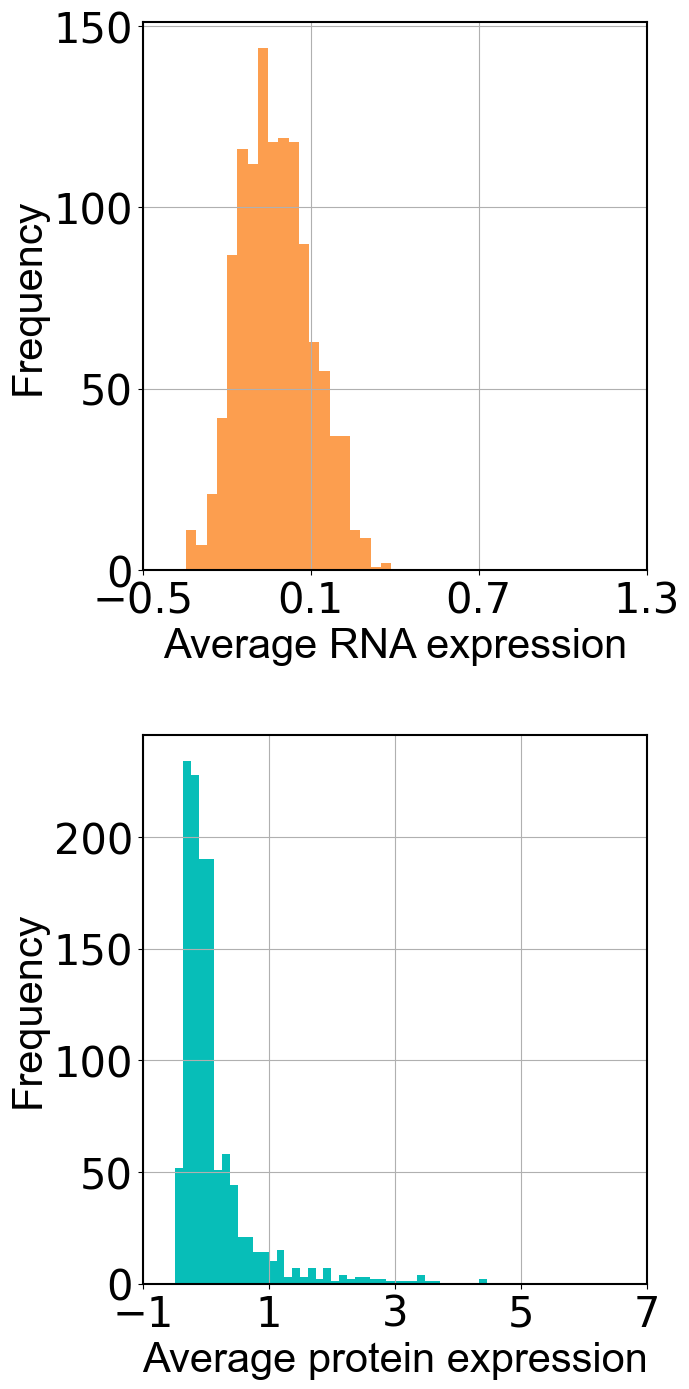

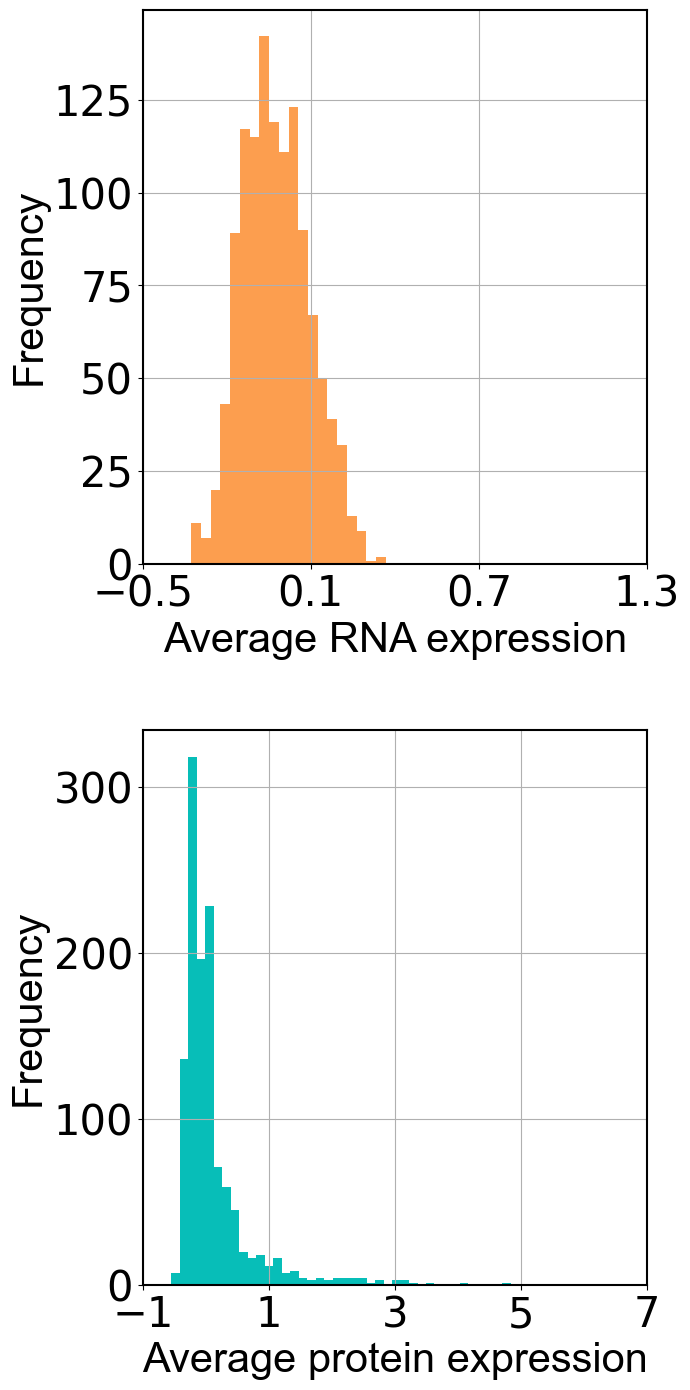

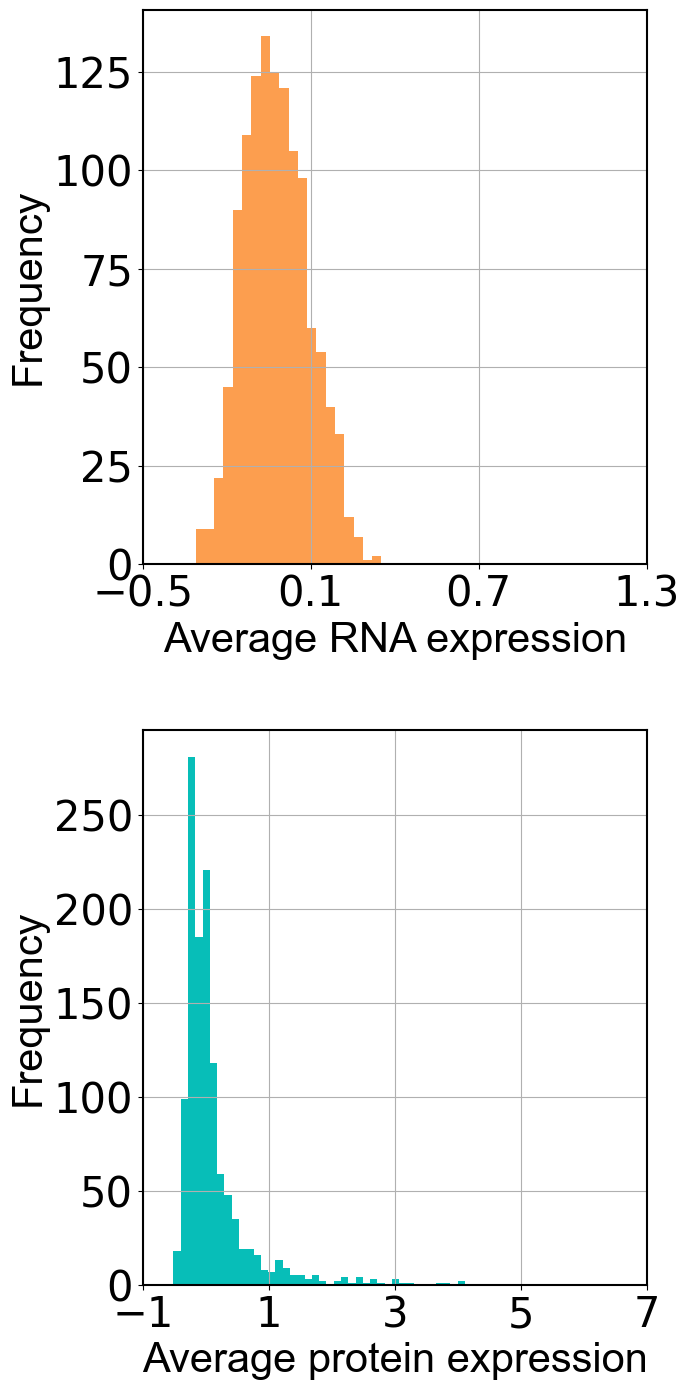

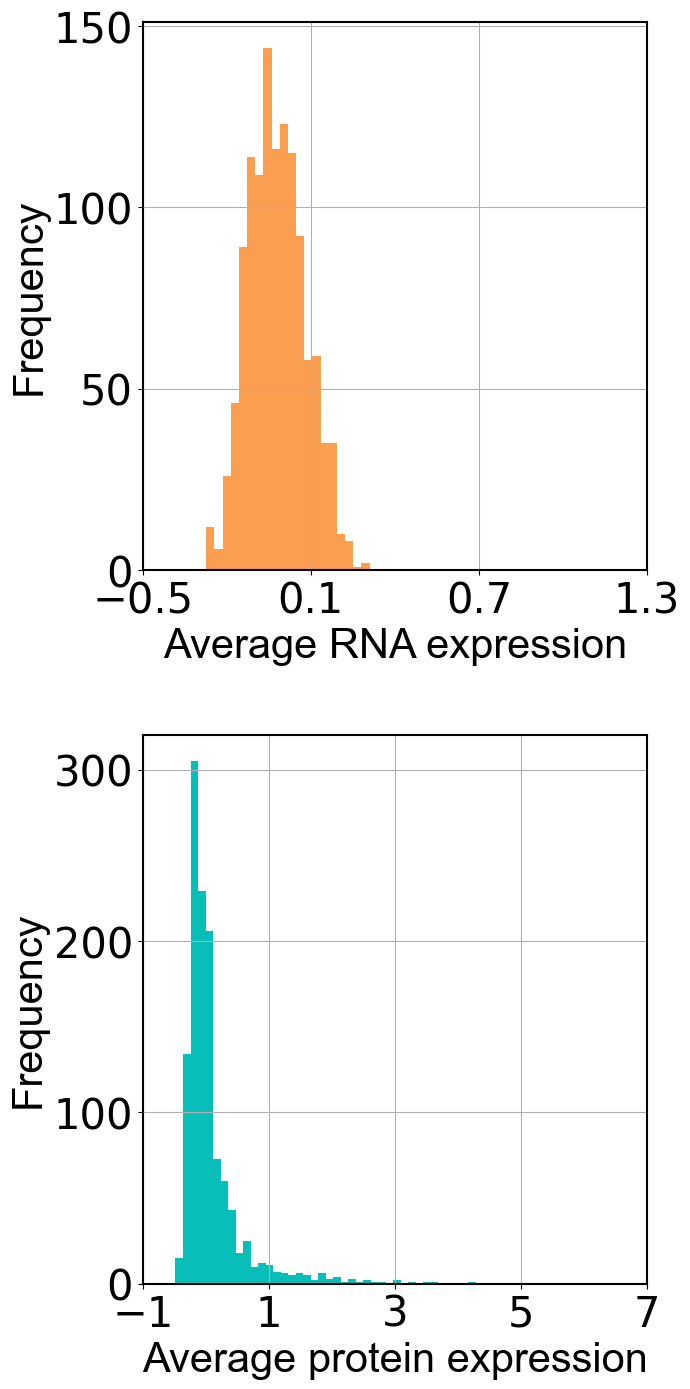

In [68]:
RNA_DATA = [adata_RNA.X, adata_RNA.obsm['level_1'], adata_RNA.obsm['level_2'], adata_RNA.obsm['level_3']]
ADT_DATA = [adata_ADT.X, adata_ADT.obsm['level_1'], adata_ADT.obsm['level_2'], adata_ADT.obsm['level_3']]

fontsize = 30

for level_id in range(4):
    RNA = RNA_DATA[level_id]
    protein = ADT_DATA[level_id]
    RNA = np.average(RNA, axis=1)
    protein = np.average(protein, axis=1)

    plt.figure(figsize=(7, 14))

    # RNA
    ax1 = plt.subplot(2, 1, 1)
    hist = plt.hist(RNA, bins=20, color='#fc9e4f', alpha=1)
    plt.title('')
    plt.xlabel('Average RNA expression', fontsize=fontsize, fontname='Arial')
    plt.ylabel('Frequency', fontsize=fontsize, fontname='Arial')
    plt.tick_params(axis='both', labelsize=fontsize)
    ticks = np.arange(-0.5, 1.31, 0.6)
    plt.xticks(ticks)
    ax1.grid(True)
    ax1.spines['top'].set_linewidth(1.5)
    ax1.spines['right'].set_linewidth(1.5)
    ax1.spines['bottom'].set_linewidth(1.5)
    ax1.spines['left'].set_linewidth(1.5)

    # Protein
    ax2 = plt.subplot(2, 1, 2)
    plt.hist(protein, bins=40, color='#07beb8', alpha=1)
    plt.title('')
    plt.xlabel('Average protein expression', fontsize=fontsize, fontname='Arial')
    plt.ylabel('Frequency', fontsize=fontsize, fontname='Arial')
    ticks = np.arange(-1, 7.1, 2)
    plt.xticks(ticks)
    plt.tick_params(axis='both', labelsize=fontsize)
    ax2.grid(True)
    ax2.spines['top'].set_linewidth(1.5)
    ax2.spines['right'].set_linewidth(1.5)
    ax2.spines['bottom'].set_linewidth(1.5)
    ax2.spines['left'].set_linewidth(1.5)

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.3)

    plt.savefig(f'Combination{Combination1_id}/Noise_Level_{level_id}.png', dpi=500)
    plt.savefig(f'Combination{Combination1_id}/Noise_Level_{level_id}.eps')

    plt.show()